 # Boston House Price Data
[Source of data](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [45]:
# IMPRTING 
from sklearn.datasets import load_boston #data
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
boston_data = load_boston()
dir(boston_data)
# type(boston_data)
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [88]:
# creating a data frame of the given data
bd = pd.DataFrame(data=boston_data.data,columns=boston_data.feature_names)
# adding another column of prices
bd['PRICE']=boston_data.target

# bd.info()

# Histogram

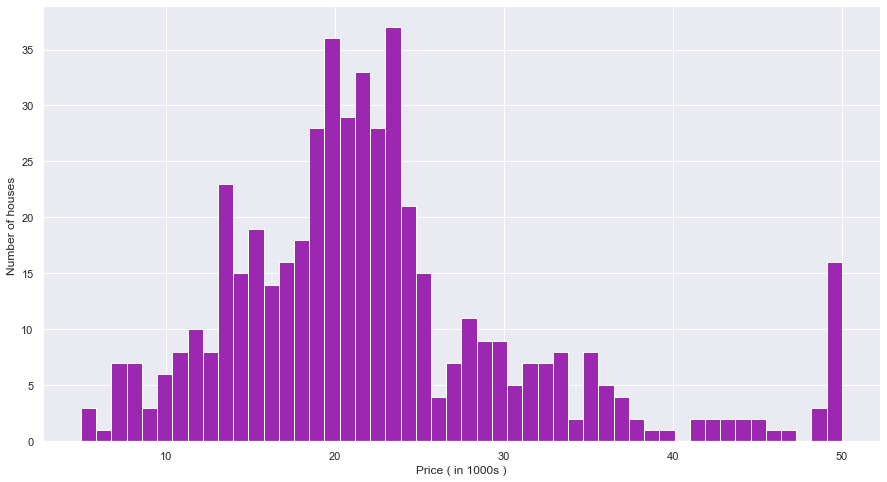

In [89]:
plt.figure(figsize=[15,8])
plt.hist(bd['PRICE'],bins=50,ec='white',color='#9C27B0')
plt.xlabel('Price ( in 1000s )')
plt.ylabel('Number of houses ')
plt.show()

# Seaborn (advanced matplot lib)

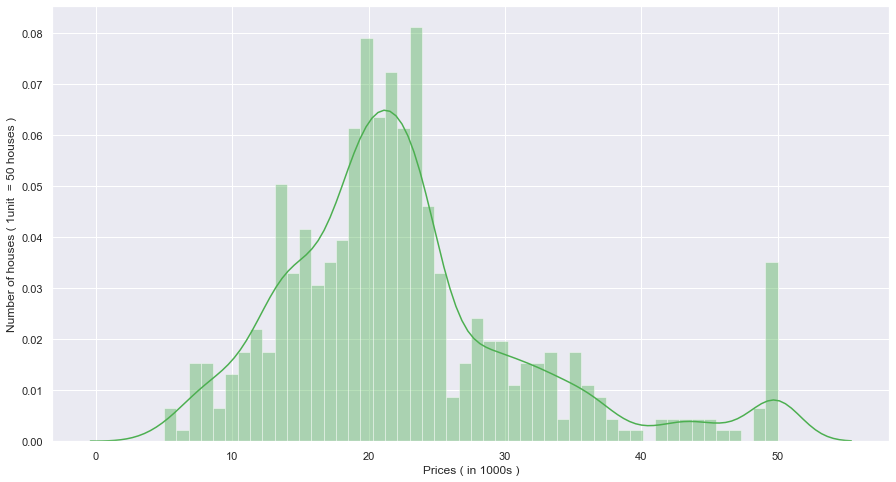

In [49]:
plt.figure(figsize=[15,8])
np_sns =  sns.distplot(bd['PRICE'],bins=50,kde=True,hist=True,color='#4CAF50')
np_sns.set(ylabel='Number of houses ( 1unit  = 50 houses )', xlabel='Prices ( in 1000s )')
plt.show()

# Number of rooms

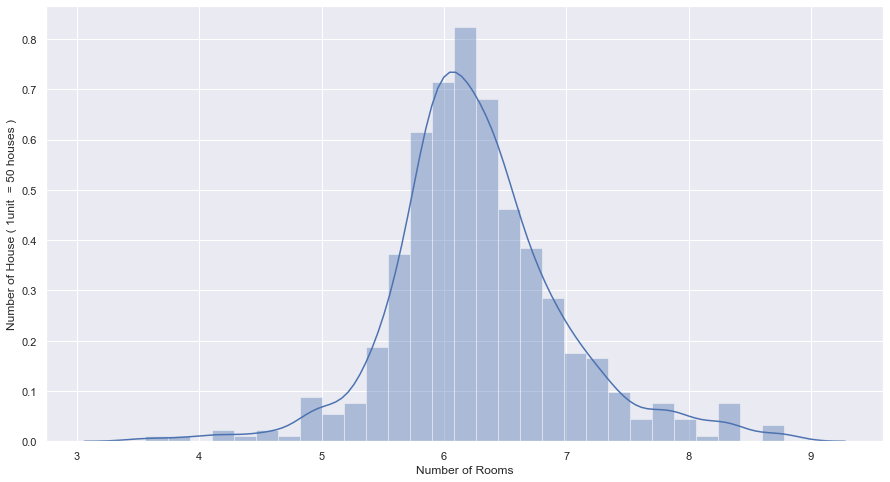

In [50]:
plt.figure(figsize=[15,8])
sns.distplot(bd['RM'])
plt.xlabel('Number of Rooms')
plt.ylabel('Number of House ( 1unit  = 50 houses )')
plt.show()

In [51]:
# Average
avg_room = bd['RM'].mean()
print('Average number of room = ' ,avg_room)

Average number of room =  6.284634387351787


# Access to Highways

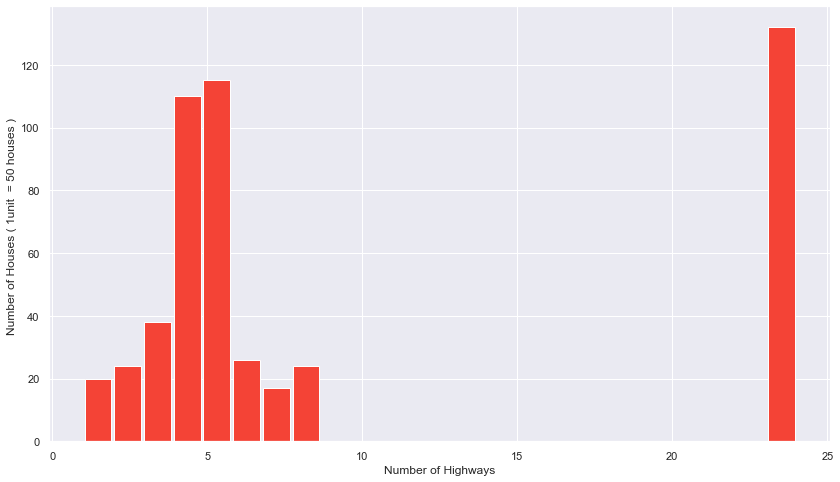

In [52]:
plt.figure(figsize=[14,8])
plt.hist(bd.RAD,bins=24,ec='white',color='#F44336',rwidth=0.9)
plt.xlabel('Number of Highways')
plt.ylabel('Number of Houses ( 1unit  = 50 houses ) ')
plt.show()

# Bar Graphs

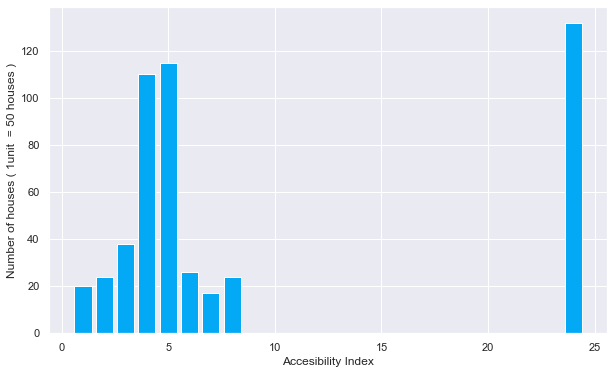

In [54]:
plt.figure(figsize=[10,6])
frequency = bd['RAD'].value_counts()
plt.bar(frequency.index,frequency,color='#03A9F4')
plt.xlabel('Accesibility Index')
plt.ylabel('Number of houses ( 1unit  = 50 houses )')
plt.show()

# River Boundation

In [55]:
# print(bd['CHAS'])
r = bd['CHAS'].value_counts()
print('Number of houses near Charles River ',r[1])

Number of houses near Charles River  35


# Descriptive statistics

In [56]:
# Mean,Median ,Min,Max

#for one column
bd['RM'].min()
bd['RM'].max()
bd['RM'].mean()
bd['RM'].median()

# for full data
bd.min()
bd.max()
bd.mean()
bd.median()

# full discrption
bd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [57]:
bd['PRICE'].corr(bd['RM'])
bd['PRICE'].corr(bd['PTRATIO'])

-0.5077866855375615

In [58]:
bd.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [59]:
mask = np.zeros_like(bd.corr())
ut = np.triu_indices_from(mask)
mask[ut]=True
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


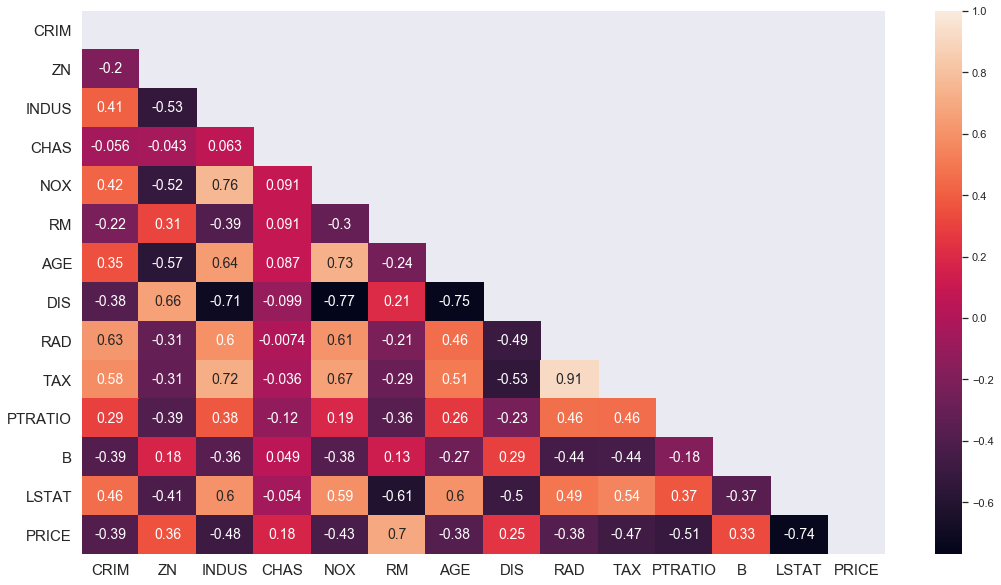

In [60]:
plt.figure(figsize=[18,10])
sns.heatmap(bd.corr(),mask = mask,annot=True,annot_kws={'size':14})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# * DIS vs NOX

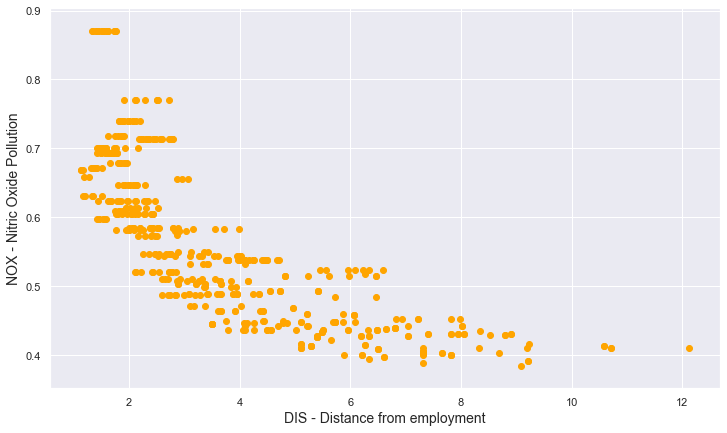

In [83]:
plt.figure(figsize=[12,7])
plt.scatter(bd['DIS'],bd['NOX'],color = 'orange')
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()

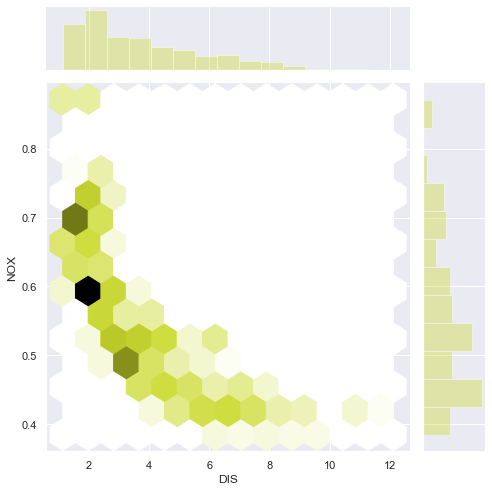

In [62]:
# seaborn plotting
sns.set()
sns.jointplot(x=bd['DIS'],y=bd['NOX'],height = 7,kind='hex',color = '#CDDC39')
plt.show()

#  RAD vs TAX

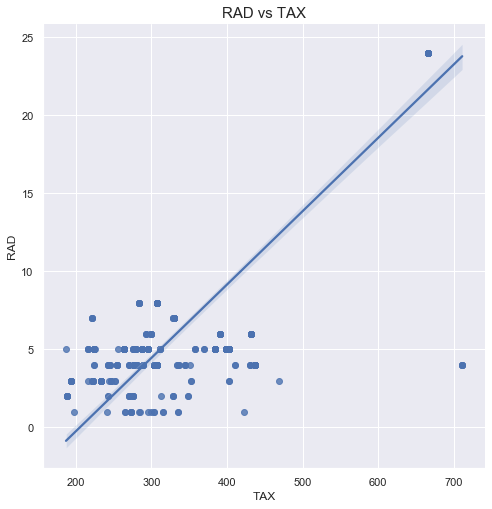

In [63]:
sns.set()
sns.lmplot(x='TAX',y='RAD',data = bd,height=7)
plt.title('RAD vs TAX',fontsize=15)
plt.show()

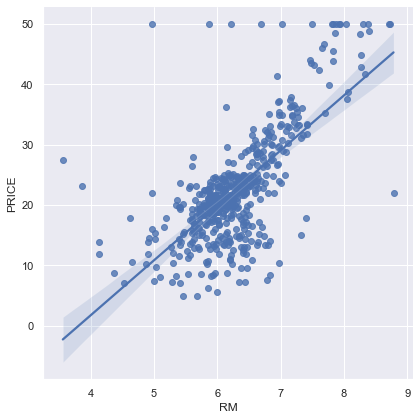

In [64]:
sns.set()
sns.lmplot(x='RM',y='PRICE',data=bd,height=6)
plt.show()

# Pair Plot

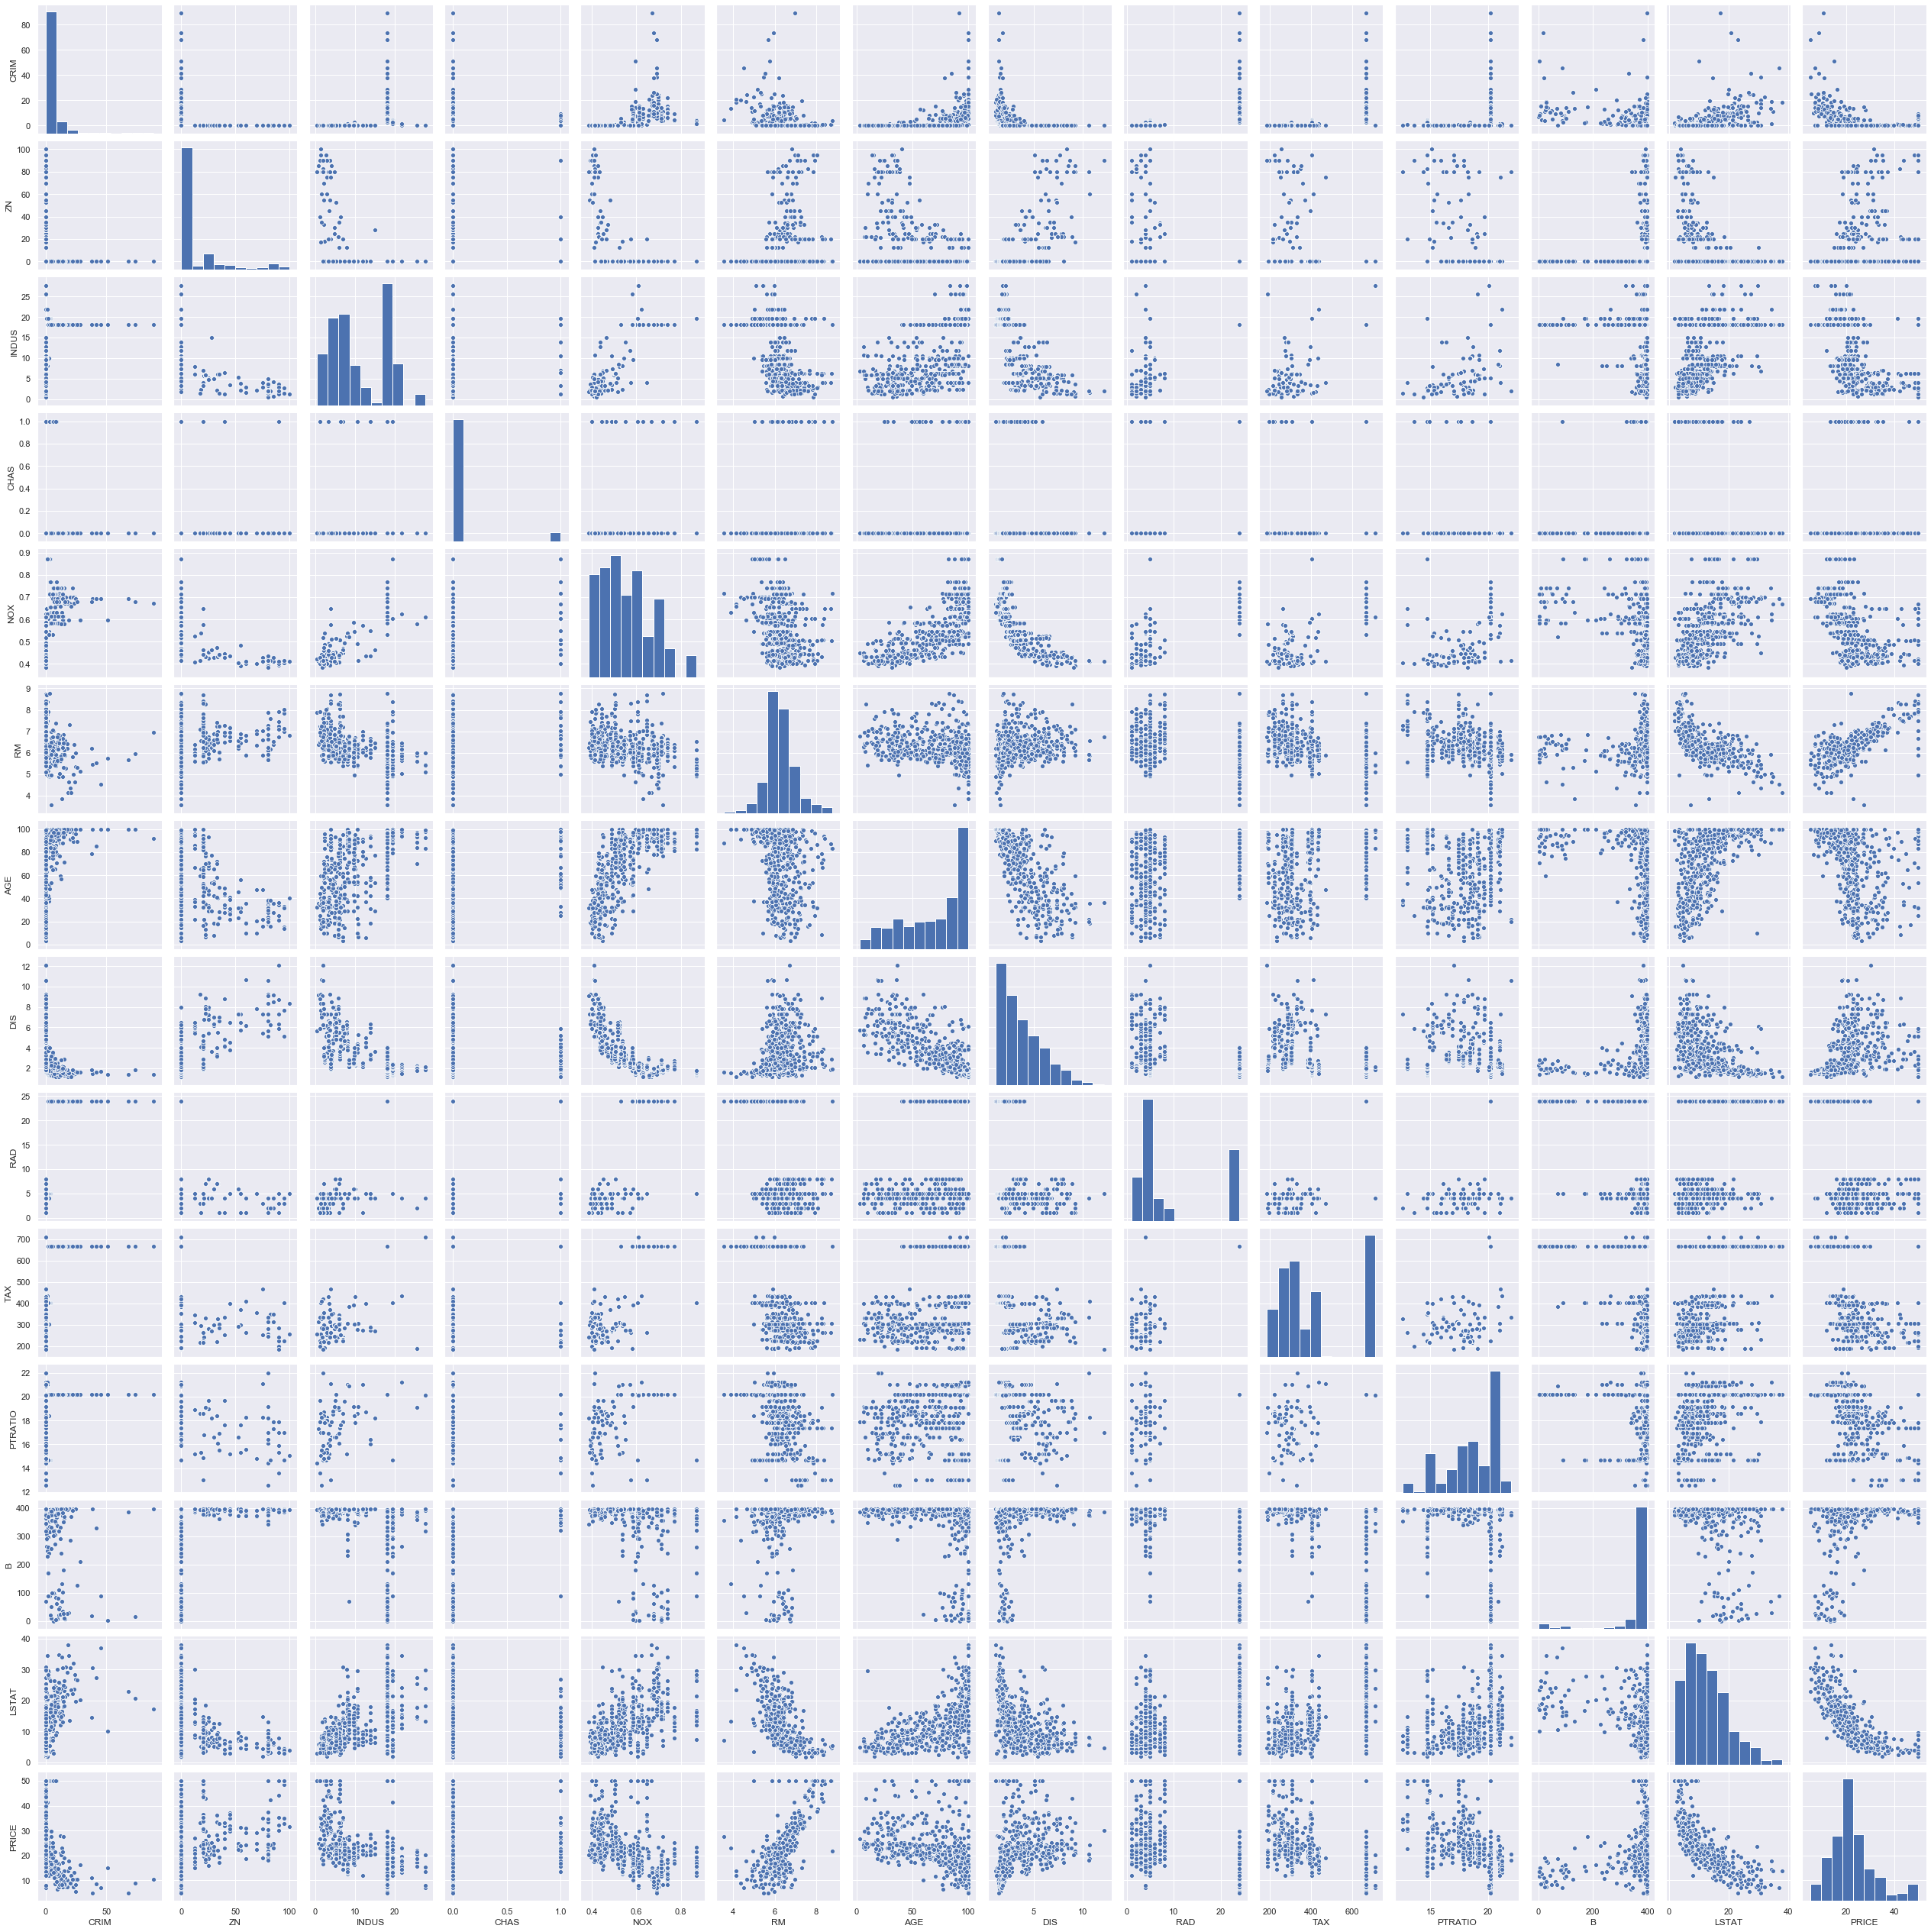

Wall time: 30.6 s


In [65]:
%%time
sns.pairplot(bd);
plt.show()

# Pair Plot with regression line

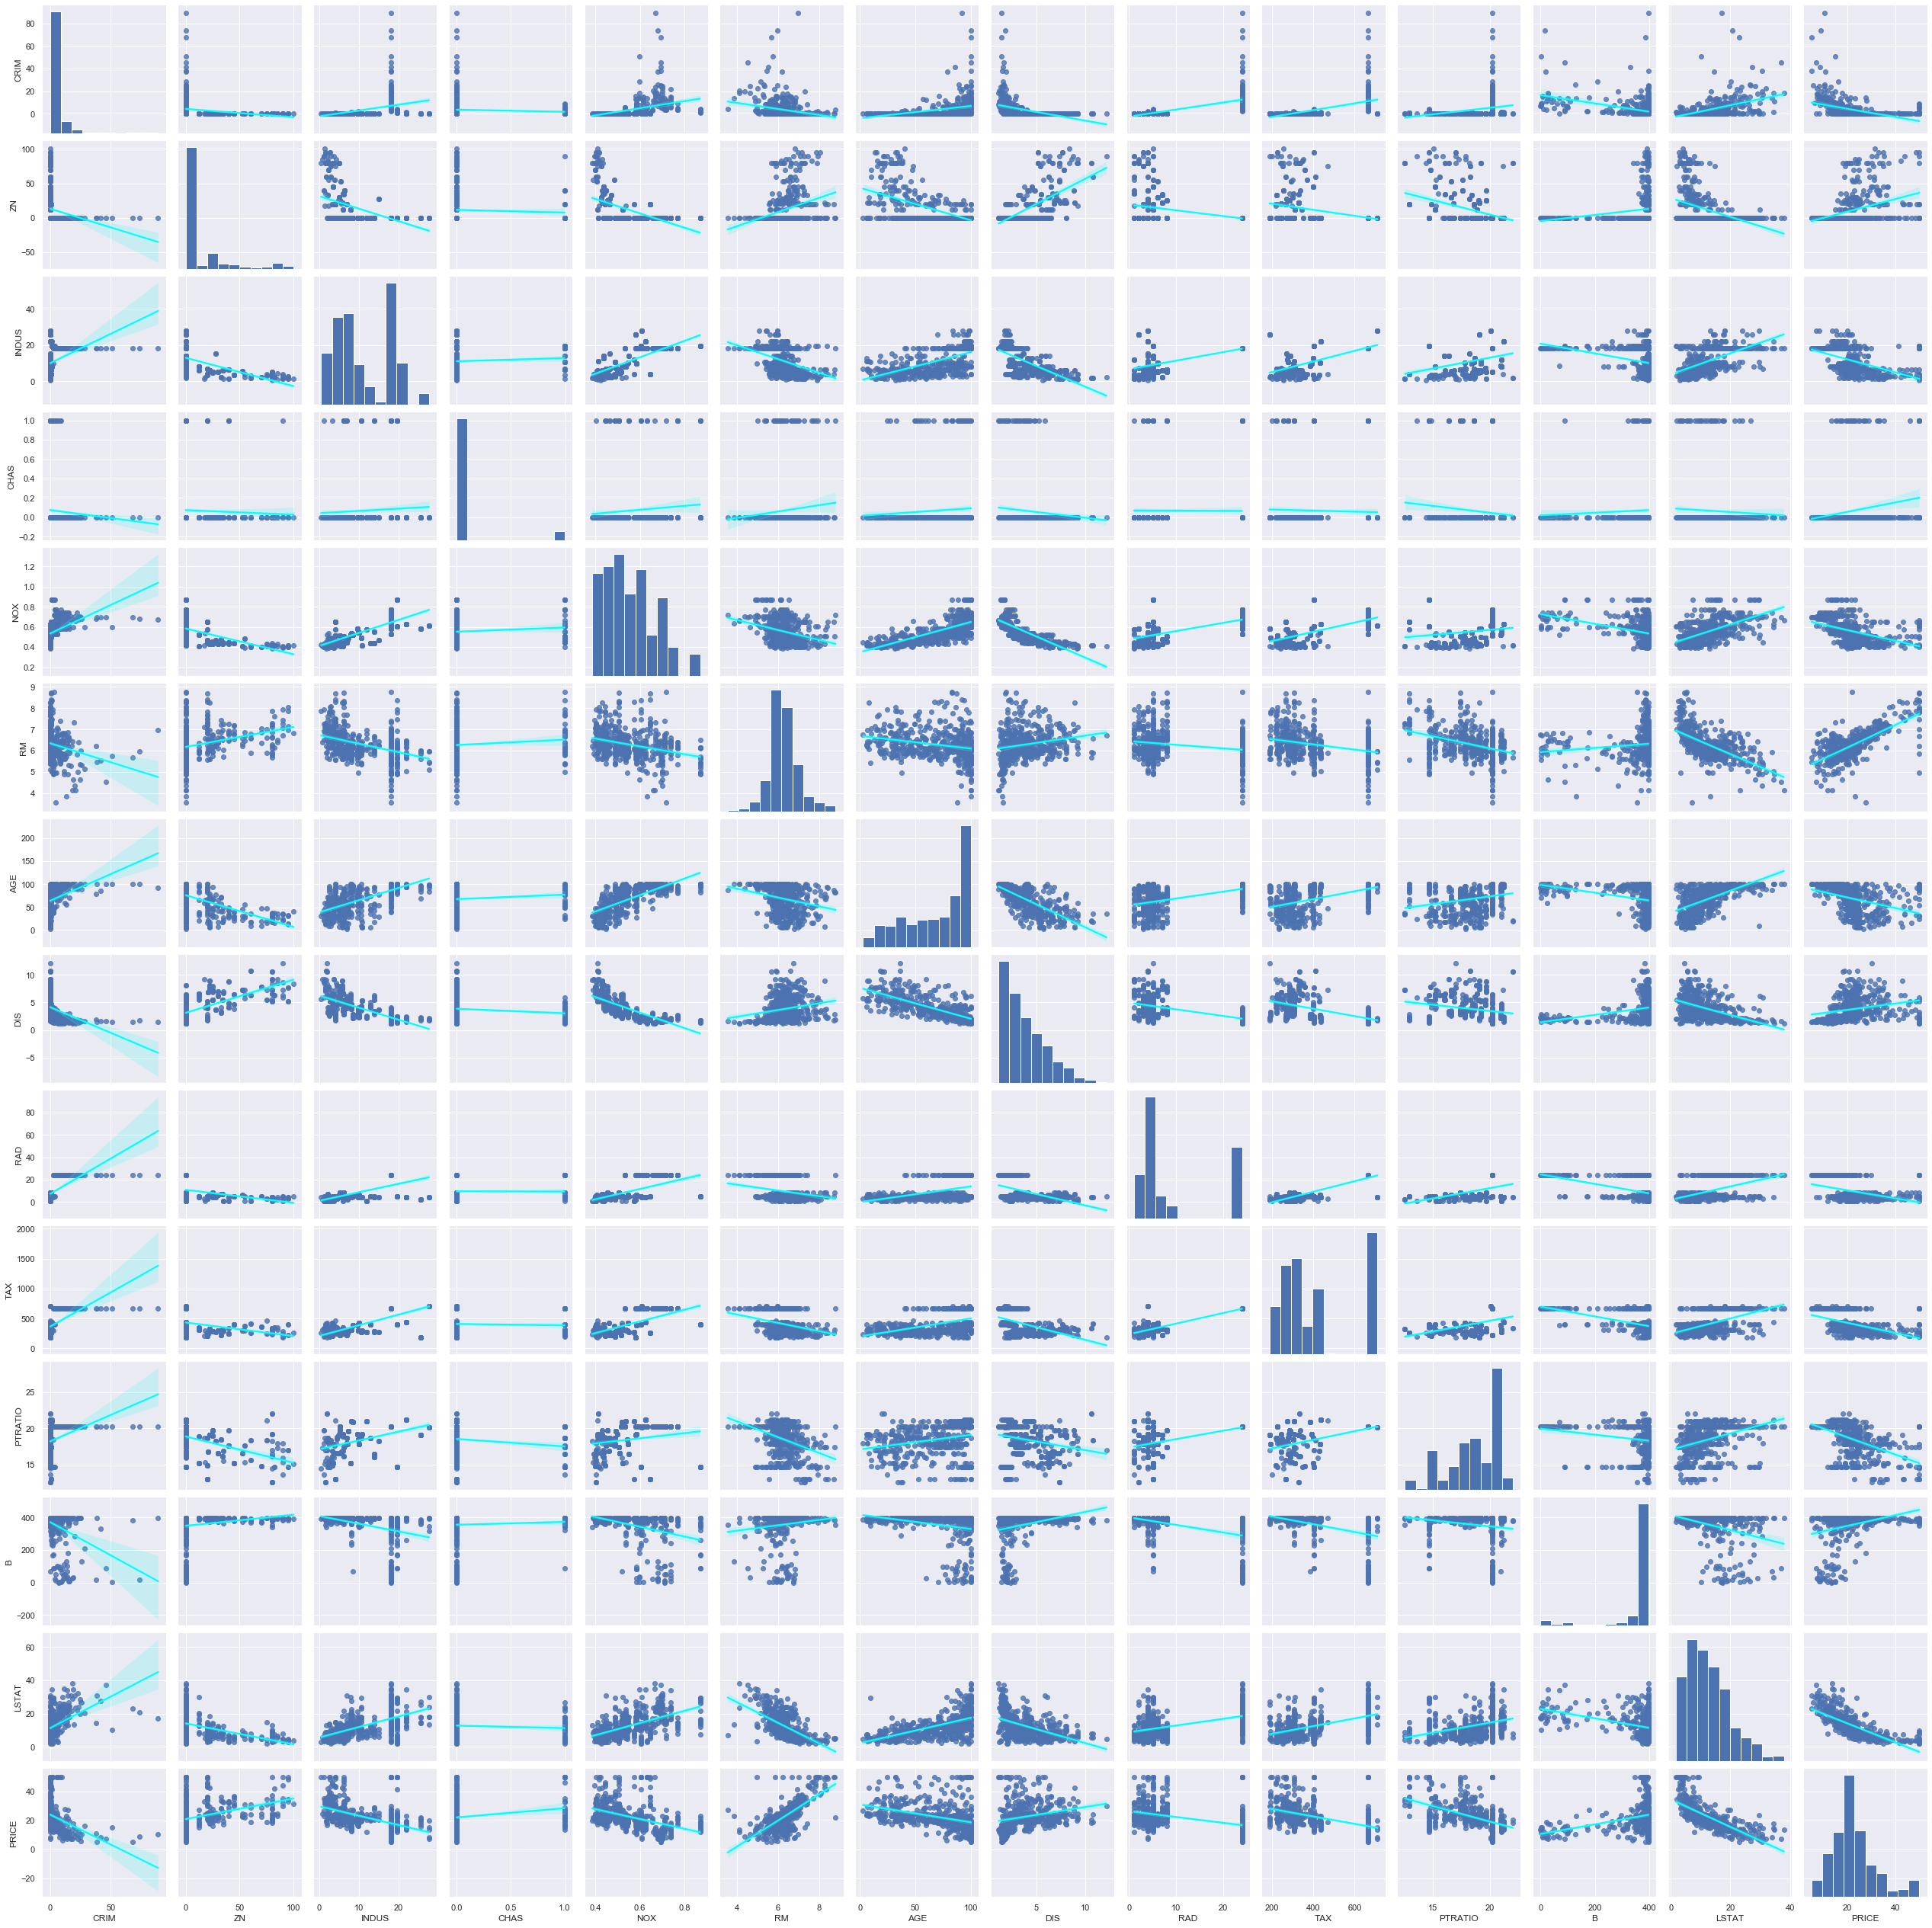

Wall time: 51.9 s


In [66]:
%%time
sns.pairplot(bd,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

# Traning and Test Dataset split

In [67]:
prices = bd['PRICE']
fearutes = bd.drop('PRICE',axis=1)

x_train,x_test,y_train,y_test = train_test_split(fearutes,prices,test_size=0.2,random_state=10)
type(x_train)

pandas.core.frame.DataFrame

# Multivariable Linear Regression

In [68]:
rega = LinearRegression()
rega.fit(x_train,y_train)

print(rega.intercept_)
pd.DataFrame(data=rega.coef_, index=x_train.columns, columns=['coef'])

36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [87]:
# R**2 value
print('R**2 value Test  = ',rega.score(x_test,y_test))
print('R**2 value Train = ',rega.score(x_train,y_train))

R**2 value Test  =  0.6709339839115628
R**2 value Train =  0.750121534530608


# Skew 

In [70]:
bd['PRICE'].skew()

1.1080984082549072

In [71]:
# To reduce skew price we take log to achive it
print('Log price of all is ',np.log(bd['PRICE']))
print('skew value of log prices is ',np.log(bd['PRICE']).skew())

Log price of all is  0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64
skew value of log prices is  -0.33032129530987864


# Data Transform

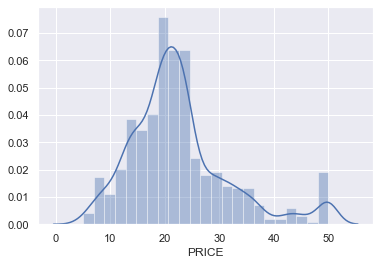

In [72]:
# Orginal Value
sns.distplot(bd['PRICE'])
plt.show()

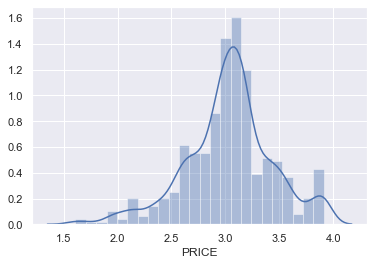

In [73]:
# Log Values
log_prices = np.log(bd['PRICE'])
sns.distplot(log_prices)
plt.show()

In [74]:
# Creating Dataframe of Log Prices
log_bd = bd.drop('PRICE',axis=1);
log_bd['Log_PRICE']=np.log(bd['PRICE'])
log_features = log_bd.drop(['Log_PRICE'],axis=1)
log_x_train, log_x_test, log_y_train, log_y_test = train_test_split(log_features,log_prices,
                                                                    test_size=0.2,random_state=10)

# Regression using log prices

In [75]:
# regression in log data frame
log_reg = LinearRegression();
log_reg.fit(log_x_train,log_y_train)

pd.DataFrame(data=log_reg.coef_, index=log_x_train.columns, columns=['coef'])

,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [76]:
# R**2 value for log value
print('log data r**2 train value = ',log_reg.score(log_x_train,log_y_train))
print('log data r**2 test value  = ',log_reg.score(log_x_test,log_y_test))

log data r**2 train value =  0.7930234826697583
log data r**2 test value  =  0.7446922306260724


# P-Value ( Significance check )
### $$P _{value} \leq 0.05 $$

In [84]:
x_incl_const = sm.add_constant(log_x_train)
model = sm.OLS(y_train,x_incl_const)
result = model.fit()
result.pvalues
pd.DataFrame({'coef':result.params,'pvalue':round(result.pvalues,3)})
# INDUS AND AGE 

,coef,pvalue
const,36.533051,0.000
CRIM,-0.128181,0.000
ZN,0.063198,0.000
INDUS,-0.007576,0.905
CHAS,1.974515,0.033
NOX,-16.271989,0.000
RM,3.108456,0.000
AGE,0.016292,0.262
DIS,-1.483014,0.000
RAD,0.303988,0.000


# Variance Inflation Factor
## Testing for Multicollinearity
#### $$ VIF _{} = \frac{1}{(1 - R _{} ^ 2)} $$
#### $$VIF \leq 10 $$

In [78]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)

1.7145250443932485

In [79]:
# All the feature VIF calculation
VIF = []
n = len(x_incl_const.values[0])
for i in range(n):
    VIF.append(round(variance_inflation_factor(exog=x_incl_const.values,exog_idx=i),3))
pd.DataFrame({'Coff': x_incl_const.columns, 'VIF' : VIF})

,Coff,VIF
0,const,597.549
1,CRIM,1.715
2,ZN,2.333
3,INDUS,3.943
4,CHAS,1.079
5,NOX,4.410
6,RM,1.840
7,AGE,3.327
8,DIS,4.223
9,RAD,7.314


# Bayesian information criterion value
## For model simplification

In [80]:
# orginal data
x_incl_const = sm.add_constant(log_x_train)
model = sm.OLS(y_train,x_incl_const)
result = model.fit()
result.pvalues
pd.DataFrame({'coef':result.params,'pvalue':round(result.pvalues,3)})
print('orginal bic value =  ',result.bic)
print('orginal r**2 value = ',result.rsquared)

orginal bic value =   2424.9546968561976
orginal r**2 value =  0.750121534530608


In [81]:
# INDUS and AGE drop
x_incl_const = sm.add_constant(log_x_train)
x_incl_const= x_incl_const.drop(['INDUS','AGE'],axis=1)
model = sm.OLS(y_train,x_incl_const)
result = model.fit()
result.pvalues
pd.DataFrame({'coef':result.params,'pvalue':round(result.pvalues,3)})
print('removed bic value =  ',result.bic)
print('removed r**2 value = ',result.rsquared)

removed bic value =   2414.269332783494
removed r**2 value =  0.7493053373352907


# <center>FINAL EQUATION<center>

# <center> PRICE = <center>
## <center> $$ {e^{\left( CIRM\times (-0.010672) +  ZN\times (0.001579)  +  CHAS\times (0.080331)  + NOX\times (-0.704068)  +  RM\times (0.073404) + DIS\times (-0.047633) + RAD\times (0.014565) + TAX\times (-0.000645) + PTRATIO\times (-0.034795) + B\times (0.000516) + LSTAT\times (-0.031390)  \right)}} + c $$ <center>